# PCOS prediction based on automatic selection of features

### Load PCOS dataset

In [1]:
import pandas as pd

pcos_data_raw = pd.read_csv('data/pcos_dataset.csv', sep=';', decimal=',')
pcos_data_raw.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.304017,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


### Exclude extra variables ("Sl. No" and "Patient File No.")

In [2]:
pcos_data = pcos_data_raw.drop(columns=['Sl. No', 'Patient File No.'])
pcos_data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.304017,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
# See dataset description
pcos_dataset_desc = pcos_data.describe()
pcos_dataset_desc.to_csv('data/pcos_dataset_description.csv', sep=';')
pcos_dataset_desc

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311231,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056186,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


### Search missing values

In [4]:
pcos_headers = pcos_data.columns

number_of_nan = 0
for header in pcos_headers:
    have_nan = pcos_data[header].isnull().any()
    if have_nan:
        number_of_nan += 1
        nan_idx = pcos_data[header].isnull().values.tolist().index(True)
        print('* Nan found in column "' + header + '" at index ' + str(nan_idx))
print('NaN values found:', number_of_nan)

* Nan found in column "Marraige Status (Yrs)" at index 458
* Nan found in column "Fast food (Y/N)" at index 156
NaN values found: 2


In [5]:
pcos_data.loc[(pcos_data['Marraige Status (Yrs)'].isnull() | pcos_data['Fast food (Y/N)'].isnull())]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
156,0,27,53.2,158.0,21.310687,13,72,22,10.5,4,...,0,NaN,1,120,70,5,7,11.0,13.0,11.0
458,1,36,66.0,162.0,25.100000,15,72,20,11.0,4,...,0,0.0,0,120,80,14,5,19.0,19.0,8.0


### Replace the missing values found

- The variable "Marraige Status (Yrs)" is quantitative therefore we apply a mean to replace the missing value
- The variable "Fast food (Y/N)" is binary therefore we apply a mode to replace the missing value

In [6]:
import numpy as np
from statistics import mode
import math

# Compute mean
marriage_status_list_without_nan_values = [x for x in pcos_data['Marraige Status (Yrs)'].values.tolist() 
                                           if math.isnan(x) == False]
avg_marriage_status = np.mean(marriage_status_list_without_nan_values)
print('Average of "Marraige Status (Yrs)" :', avg_marriage_status)

# Compute mode
fast_food_list_without_nan_values = [x for x in pcos_data['Fast food (Y/N)'].values.tolist() 
                                     if math.isnan(x) == False]
mode_fast_food = mode(fast_food_list_without_nan_values)
print('Mode of "Fast food (Y/N)" :', mode_fast_food)

# Replacement
pcos_data.loc[(pcos_data['Marraige Status (Yrs)'].isnull()), 'Marraige Status (Yrs)'] = avg_marriage_status
pcos_data.loc[(pcos_data['Fast food (Y/N)'].isnull()), 'Fast food (Y/N)'] = mode_fast_food

Average of "Marraige Status (Yrs)" : 7.6809259259259255
Mode of "Fast food (Y/N)" : 1.0


In [7]:
pcos_data.loc[(pcos_data['Marraige Status (Yrs)'].isnull() | pcos_data['Fast food (Y/N)'].isnull())]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


### Search outliers

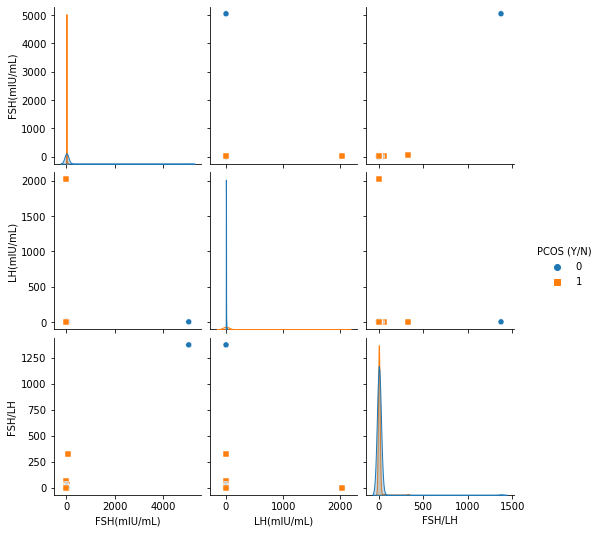

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

splot = sns.pairplot(pcos_data,
                     hue='PCOS (Y/N)',
                     vars=['FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH'],
                    kind='scatter',
                    diag_kind='auto',
                    markers=['o', 's'])
plt.show()
splot.savefig('scatterplot-outliers.png')

### Outliers removal
With respect to the variables related with FSH and LH, the huge values that they present are not normal. In fact, the maximum admited value for FSH is around 26 mIU/mL and for LH is 104 mIU/mL.

In [9]:
# Showing the outliers
pcos_data.loc[(pcos_data['FSH(mIU/mL)'] > 70) | (pcos_data['LH(mIU/mL)'] > 200)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
329,0,29,53.0,161.0,20.4,15,72,18,10.2,2,...,1,1.0,0,110,80,6,4,16.0,17.0,6.0
455,1,32,52.0,150.0,23.1,13,70,18,9.4,2,...,1,0.0,1,110,80,6,7,18.0,18.0,9.0


In [10]:
# Removing the outliers rows
pcos_clean_data = pcos_data.drop(labels=[329, 455], axis=0, inplace=False)
pcos_clean_data.loc[(pcos_clean_data['FSH(mIU/mL)'] > 70) | (pcos_clean_data['LH(mIU/mL)'] > 200)]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


As can be seen above and below, there are two rows that were removed, corresponding to the ones that contained the outliers

In [11]:
# Shape of data before outliers removal
print(pcos_data.shape)

# Shape of data after outliers removal
print(pcos_clean_data.shape)

(541, 42)
(539, 42)


### Save clean data (without missing values and outliers)

In [12]:
pcos_clean_data.to_csv('data/clean_pcos_dataset.csv', sep=';', index=False)

### Feature selection using Univariate Feature Selection method

In [13]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
x = pcos_clean_data.drop(columns=['PCOS (Y/N)'])
x_scaled = min_max_scaler.fit_transform(x)
y = pcos_clean_data['PCOS (Y/N)']

features_list = x.columns.tolist()

In [14]:
# Univariate feature selection with ANOVA F-value and k=8
uni = SelectKBest(score_func=f_classif, k=8)
fit = uni.fit(x_scaled, y)
features_anova_fval_k8 = x.columns[fit.get_support(indices=True)].tolist()
feat_scores = uni.scores_

for feat in features_anova_fval_k8:
    for i in range(0, len(features_list)):
        if features_list[i] == feat:
            print(feat + ' : ' + str(feat_scores[i]))

Cycle(R/I) : 104.57691794477944
Weight gain(Y/N) : 131.59849568488917
hair growth(Y/N) : 149.72153917195692
Skin darkening (Y/N) : 159.1701264512084
Pimples(Y/N) : 47.80326596078768
Fast food (Y/N) : 91.62151245513815
Follicle No. (L) : 309.7338150461549
Follicle No. (R) : 390.97118042000426


In [15]:
# Univariate feature selection with ANOVA F-value and k=12
uni = SelectKBest(score_func=f_classif, k=12)
fit = uni.fit(x_scaled, y)
features_anova_fval_k12 = x.columns[fit.get_support(indices=True)].tolist()
feat_scores = uni.scores_

for feat in features_anova_fval_k12:
    for i in range(0, len(features_list)):
        if features_list[i] == feat:
            print(feat + ' : ' + str(feat_scores[i]))

Weight (Kg) : 25.68999350595436
BMI : 22.294173235980896
Cycle(R/I) : 104.57691794477944
Cycle length(days) : 17.6065334362112
AMH(ng/mL) : 39.91107279308422
Weight gain(Y/N) : 131.59849568488917
hair growth(Y/N) : 149.72153917195692
Skin darkening (Y/N) : 159.1701264512084
Pimples(Y/N) : 47.80326596078768
Fast food (Y/N) : 91.62151245513815
Follicle No. (L) : 309.7338150461549
Follicle No. (R) : 390.97118042000426


In [16]:
# Univariate feature selection with Chi2 and k=8
uni = SelectKBest(score_func=chi2, k=8)
fit = uni.fit(x_scaled, y)
features_chi2_k8 = x.columns[fit.get_support(indices=True)].tolist()
feat_scores = uni.scores_

for feat in features_chi2_k8:
    for i in range(0, len(features_list)):
        if features_list[i] == feat:
            print(feat + ' : ' + str(feat_scores[i]))

Cycle(R/I) : 42.398241907524074
Weight gain(Y/N) : 65.93717505941774
hair growth(Y/N) : 85.24724866912366
Skin darkening (Y/N) : 85.28153523183644
Pimples(Y/N) : 22.560922917386797
Fast food (Y/N) : 38.04071969696971
Follicle No. (L) : 26.199671259980384
Follicle No. (R) : 33.67468920782363


In [17]:
# Univariate feature selection with Chi2 and k=12
uni = SelectKBest(score_func=chi2, k=12)
fit = uni.fit(x_scaled, y)
features_chi2_k12 = x.columns[fit.get_support(indices=True)].tolist()
feat_scores = uni.scores_

for feat in features_chi2_k12:
    for i in range(0, len(features_list)):
        if features_list[i] == feat:
            print(feat + ' : ' + str(feat_scores[i]))

Cycle(R/I) : 42.398241907524074
AMH(ng/mL) : 3.5415946286803126
Vit D3 (ng/mL) : 1.581013551051187
Weight gain(Y/N) : 65.93717505941774
hair growth(Y/N) : 85.24724866912366
Skin darkening (Y/N) : 85.28153523183644
Hair loss(Y/N) : 9.289896920019874
Pimples(Y/N) : 22.560922917386797
Fast food (Y/N) : 38.04071969696971
Reg.Exercise(Y/N) : 1.4764752791068594
Follicle No. (L) : 26.199671259980384
Follicle No. (R) : 33.67468920782363


In [18]:
# See common selected features from the sets
common_feature_selected = list(set().union(features_anova_fval_k8, features_anova_fval_k12, features_chi2_k8, features_chi2_k12))
common_feature_selected

['BMI',
 'Cycle length(days)',
 'Follicle No. (R)',
 'Cycle(R/I)',
 'Follicle No. (L)',
 'hair growth(Y/N)',
 'Pimples(Y/N)',
 'Weight (Kg)',
 'AMH(ng/mL)',
 'Reg.Exercise(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Fast food (Y/N)',
 'Vit D3 (ng/mL)',
 'Weight gain(Y/N)']

In [20]:
# Export description of selected features
selected_pcos_data = pcos_clean_data[common_feature_selected]
selected_pcos_dataset_desc = selected_pcos_data.describe()
selected_pcos_dataset_desc.to_csv('data/selected_pcos_dataset_description.csv', sep=';')
selected_pcos_dataset_desc

,BMI,Cycle length(days),Follicle No. (R),Cycle(R/I),Follicle No. (L),hair growth(Y/N),Pimples(Y/N),Weight (Kg),AMH(ng/mL),Reg.Exercise(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Fast food (Y/N),Vit D3 (ng/mL),Weight gain(Y/N)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,24.320735,4.938776,6.645640,2.562152,6.129870,0.274583,0.487941,59.663636,5.624281,0.246753,0.307978,0.452690,0.515770,49.971889,0.378479
std,4.059871,1.494090,4.443641,0.902977,4.237141,0.446718,0.500319,11.040120,5.885679,0.431522,0.462086,0.498219,0.500215,346.848075,0.485458
min,12.417882,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.674599,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,52.000000,2.010000,0.000000,0.000000,0.000000,0.000000,20.750000,0.000000
50%,24.238227,5.000000,6.000000,2.000000,5.000000,0.000000,0.000000,59.600000,3.700000,0.000000,0.000000,0.000000,1.000000,25.900000,0.000000
75%,26.650813,5.000000,10.000000,4.000000,9.000000,1.000000,1.000000,65.000000,6.880000,0.000000,1.000000,1.000000,1.000000,34.450000,1.000000
max,38.900000,12.000000,20.000000,5.000000,22.000000,1.000000,1.000000,108.000000,66.000000,1.000000,1.000000,1.000000,1.000000,6014.660000,1.000000


### Classification

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time

# Dictionary of features to use (calculated before using Feature Selection)
features_dict = {
    'ANOVA F-value , k=8': features_anova_fval_k8,
    'ANOVA F-value , k=12': features_anova_fval_k12,
    'Chi2 , k=8': features_chi2_k8,
    'Chi2 , k=12': features_chi2_k12
}

In [34]:
# Definition of algorithms to test and number of folds to use while performing k-fold cross validation
K_FOLDS = 10
CLASSIFIERS = ['Decision Tree', 'Nearest Neighbors', 'SVM', 'Neural Network']

#### Initial classification test with random configuration

In [35]:
# Dictionary for saving the results
init_results_dict = {
    CLASSIFIERS[0]: [],
    CLASSIFIERS[1]: [],
    CLASSIFIERS[2]: [],
    CLASSIFIERS[3]: []
}

for key in features_dict:
    print('* ' + key)
    inputs = min_max_scaler.fit_transform(pcos_clean_data[features_dict[key]])
    outputs = y.values
    for classifier in CLASSIFIERS:
        print('\t> ' + classifier)

        # Load each classifier
        if classifier == 'Decision Tree':
            clf = DecisionTreeClassifier()
        elif classifier == 'Nearest Neighbors':
            clf = KNeighborsClassifier()
        elif classifier == 'SVM':
            clf = LinearSVC()
        elif classifier == 'Neural Network':
            clf = MLPClassifier(max_iter=10000)

        # Cross validation
        start_t = time.time()
        res = cross_validate(clf, inputs, outputs, cv=K_FOLDS, scoring=['accuracy', 'precision', 'recall', 'f1'])
        end_t = time.time()
        avg_accuracy = round(np.mean(res['test_accuracy']) * 100, 2)
        print('\t   * Accuracy: ' + str(avg_accuracy) + '%')
        print('\t   * Precision: ' + str(round(np.mean(res['test_precision']) * 100, 2)) + '%')
        print('\t   * Recall: ' + str(round(np.mean(res['test_recall']) * 100, 2)) + '%')
        print('\t   * F1-score: ' + str(round(np.mean(res['test_f1']) * 100, 2)) + '%')
        print('\t   * Training time: ' + str(round(end_t - start_t, 4)) + ' seconds.')
        init_results_dict[classifier].append(avg_accuracy)

* ANOVA F-value , k=8
	> Decision Tree
	   * Accuracy: 85.53%
	   * Precision: 79.29%
	   * Recall: 75.62%
	   * F1-score: 77.06%
	   * Training time: 0.0349 seconds.
	> Nearest Neighbors
	   * Accuracy: 84.04%
	   * Precision: 77.9%
	   * Recall: 72.25%
	   * F1-score: 73.49%
	   * Training time: 0.0478 seconds.
	> SVM
	   * Accuracy: 91.47%
	   * Precision: 89.07%
	   * Recall: 84.74%
	   * F1-score: 86.53%
	   * Training time: 0.0339 seconds.
	> Neural Network
	   * Accuracy: 89.43%
	   * Precision: 84.81%
	   * Recall: 83.1%
	   * F1-score: 83.51%
	   * Training time: 27.7252 seconds.
* ANOVA F-value , k=12
	> Decision Tree
	   * Accuracy: 82.94%
	   * Precision: 76.7%
	   * Recall: 72.09%
	   * F1-score: 73.8%
	   * Training time: 0.0329 seconds.
	> Nearest Neighbors
	   * Accuracy: 84.22%
	   * Precision: 79.96%
	   * Recall: 70.52%
	   * F1-score: 73.21%
	   * Training time: 0.0518 seconds.
	> SVM
	   * Accuracy: 91.47%
	   * Precision: 88.48%
	   * Recall: 85.29%
	   * F1-score

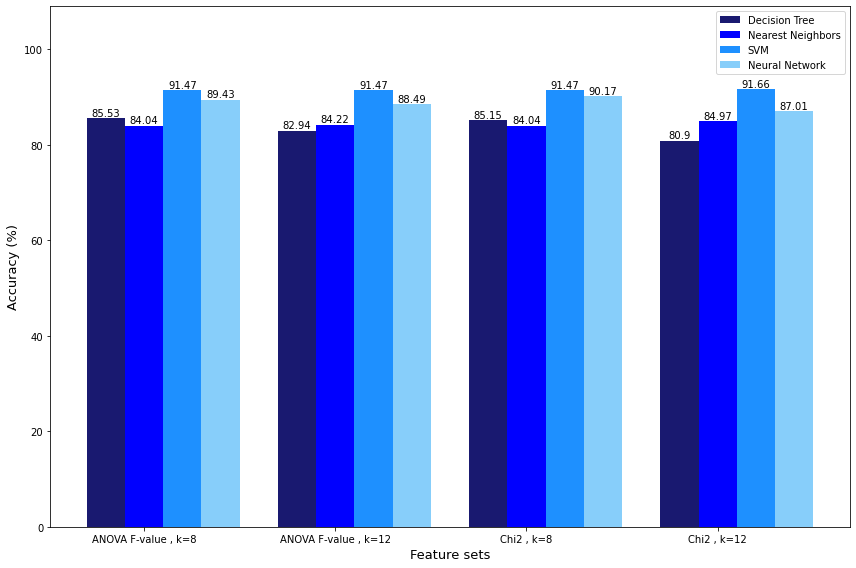

In [36]:
# Helper function
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(x[i], y[i]+0.5, y[i], ha = 'center')

# Plot bar graph with the results
bar_width = 0.2 # width of the bars
loc1 = np.arange(len(init_results_dict[CLASSIFIERS[0]]))
loc2 = [x + bar_width for x in loc1]
loc3 = [x + bar_width for x in loc2]
loc4 = [x + bar_width for x in loc3]

fig = plt.subplots(figsize=(12,8))

plt.bar(loc1, init_results_dict[CLASSIFIERS[0]], color=(25./255, 25./255, 112./255), width=bar_width, label=CLASSIFIERS[0])
add_labels(loc1, init_results_dict[CLASSIFIERS[0]])
plt.bar(loc2, init_results_dict[CLASSIFIERS[1]], color=(0, 0, 1), width=bar_width, label=CLASSIFIERS[1])
add_labels(loc2, init_results_dict[CLASSIFIERS[1]])
plt.bar(loc3, init_results_dict[CLASSIFIERS[2]], color=(30./255, 144./255, 1), width=bar_width, label=CLASSIFIERS[2])
add_labels(loc3, init_results_dict[CLASSIFIERS[2]])
plt.bar(loc4, init_results_dict[CLASSIFIERS[3]], color=(135./255, 206./255, 250./255), width=bar_width, label=CLASSIFIERS[3])
add_labels(loc4, init_results_dict[CLASSIFIERS[3]])

plt.xlabel('Feature sets', fontsize = 13)
plt.ylabel('Accuracy (%)', fontsize = 13)

bar_graph_labels = ['ANOVA F-value , k=8', 'ANOVA F-value , k=12', 'Chi2 , k=8', 'Chi2 , k=12']

plt.xticks([r + bar_width for r in range(len(init_results_dict[CLASSIFIERS[0]]))], bar_graph_labels)

plt.ylim(0, 109)

plt.tight_layout()
plt.legend()
plt.savefig('results_first.png')
plt.show()

#### Classification with parameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV, KFold

# Classifier parameters for tuning
clf_param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [5, 10, 15, 20],
        'max_features': ['sqrt', 'log2']
    },
    'Nearest Neighbors': {
        'n_neighbors': [5, 10, 15, 20, 25],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
    },
    'SVM': {
        'C': [0.1, 0.5, 1.0, 10.0],
        'multi_class': ['ovr', 'crammer_singer']
    },
    'Neural Network': {
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    }
}

# Load KFold
cross_validation = KFold(n_splits=K_FOLDS)

In [38]:
# Dictionary for saving the results
fine_results_dict = {
    CLASSIFIERS[0]: [],
    CLASSIFIERS[1]: [],
    CLASSIFIERS[2]: [],
    CLASSIFIERS[3]: []
}

for key in features_dict:
    print('* ' + key)
    inputs = min_max_scaler.fit_transform(pcos_clean_data[features_dict[key]])
    outputs = y.values
    for classifier in CLASSIFIERS:
        print('\t> ' + classifier)

        # Load each classifier
        if classifier == 'Decision Tree':
            clf = DecisionTreeClassifier()
        elif classifier == 'Nearest Neighbors':
            clf = KNeighborsClassifier()
        elif classifier == 'SVM':
            clf = LinearSVC(max_iter=100000)
        elif classifier == 'Neural Network':
            clf = MLPClassifier(max_iter=10000)

        # Grid search (GS)
        grid_search = GridSearchCV(clf, param_grid=clf_param_grids[classifier], cv=cross_validation)
        grid_search.fit(inputs, outputs)
        print('\tGS best score: ' + str(round(grid_search.best_score_*100, 2)) + '%')
        print('\tGS best parameters: ' + str(grid_search.best_params_))

        # Cross validation (CV)
        clf = grid_search.best_estimator_
        start_t = time.time()
        res = cross_validate(clf, inputs, outputs, cv=K_FOLDS, scoring=['accuracy', 'precision', 'recall', 'f1'])
        end_t = time.time()
        avg_accuracy = round(np.mean(res['test_accuracy']) * 100, 2)
        print('\t   * Accuracy: ' + str(avg_accuracy) + '%')
        print('\t   * Precision: ' + str(round(np.mean(res['test_precision']) * 100, 2)) + '%')
        print('\t   * Recall: ' + str(round(np.mean(res['test_recall']) * 100, 2)) + '%')
        print('\t   * F1-score: ' + str(round(np.mean(res['test_f1']) * 100, 2)) + '%')
        print('\t   * Training time: ' + str(round(end_t - start_t, 4)) + ' seconds.')
        fine_results_dict[classifier].append(avg_accuracy)

* ANOVA F-value , k=8
	> Decision Tree
	GS best score: 86.46%
	GS best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'splitter': 'best'}
	   * Accuracy: 82.75%
	   * Precision: 75.4%
	   * Recall: 71.7%
	   * F1-score: 72.45%
	   * Training time: 0.0229 seconds.
	> Nearest Neighbors
	GS best score: 86.64%
	GS best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'uniform'}
	   * Accuracy: 86.26%
	   * Precision: 84.67%
	   * Recall: 71.11%
	   * F1-score: 75.53%
	   * Training time: 0.0419 seconds.
	> SVM
	GS best score: 91.65%
	GS best parameters: {'C': 1.0, 'multi_class': 'ovr'}
	   * Accuracy: 91.47%
	   * Precision: 89.07%
	   * Recall: 84.74%
	   * F1-score: 86.53%
	   * Training time: 0.0319 seconds.
	> Neural Network
	GS best score: 91.83%
	GS best parameters: {'activation': 'identity', 'learning_rate': 'constant', 'solver': 'lbfgs'}
	   * Accuracy: 91.47%
	   * Precision: 88.61%
	   * Recall: 85.29%
	   * F1-score: 86.61%
	   * T

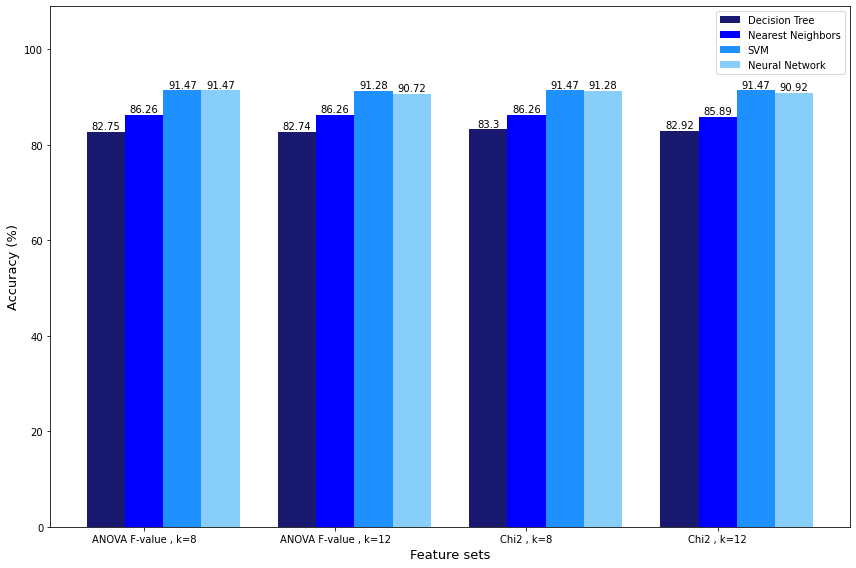

In [40]:
# Plot bar graph with the results
bar_width = 0.2 # width of the bars
loc1 = np.arange(len(fine_results_dict[CLASSIFIERS[0]]))
loc2 = [x + bar_width for x in loc1]
loc3 = [x + bar_width for x in loc2]
loc4 = [x + bar_width for x in loc3]

fig = plt.subplots(figsize=(12,8))

plt.bar(loc1, fine_results_dict[CLASSIFIERS[0]], color=(25./255, 25./255, 112./255), width=bar_width, label=CLASSIFIERS[0])
add_labels(loc1, fine_results_dict[CLASSIFIERS[0]])
plt.bar(loc2, fine_results_dict[CLASSIFIERS[1]], color=(0, 0, 1), width=bar_width, label=CLASSIFIERS[1])
add_labels(loc2, fine_results_dict[CLASSIFIERS[1]])
plt.bar(loc3, fine_results_dict[CLASSIFIERS[2]], color=(30./255, 144./255, 1), width=bar_width, label=CLASSIFIERS[2])
add_labels(loc3, fine_results_dict[CLASSIFIERS[2]])
plt.bar(loc4, fine_results_dict[CLASSIFIERS[3]], color=(135./255, 206./255, 250./255), width=bar_width, label=CLASSIFIERS[3])
add_labels(loc4, fine_results_dict[CLASSIFIERS[3]])

plt.xlabel('Feature sets', fontsize = 13)
plt.ylabel('Accuracy (%)', fontsize = 13)

bar_graph_labels = ['ANOVA F-value , k=8', 'ANOVA F-value , k=12', 'Chi2 , k=8', 'Chi2 , k=12']

plt.xticks([r + bar_width for r in range(len(fine_results_dict[CLASSIFIERS[0]]))], bar_graph_labels)

plt.ylim(0, 109)

plt.tight_layout()
plt.legend()
plt.savefig('results_second.png')
plt.show()